> ##### **Proiect** utilizare _Machine Learning_ in dataset **Auto Imports**

"_Tehnici de colectare si manipulare a datelor_" si "_Data mining si invatare automata_"

Student: Chanchian Armin Andrei

-- SDIA AN1 

###### `I. Definire problema`

Plecand de la dataset-ul utilizat, **Automobile Imports**, ce are in vedere modelele de automobile din "Ward's Automotive Yearbook", datat 1985, se vor face cateva analize si predictii, precum constituirea unui model de regresie ce estimeaza pretul unei masini.

###### `II. Colectarea datelor`

Provenienta datelor este **UCI Machine Learning Repository**.

Sursa: https://archive.ics.uci.edu/dataset/10/automobile

Datele sunt de tip categorice si numerice continue.

Dimensiunile specificate: 205 inregistrari si 26 coloane.

###### `1. Incarcarea datelor`

In [0]:
import pandas as pd

In [0]:
dataset_path = 'imports-85.data'

columns = [
    'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
    'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
    'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
    'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
    'highway_mpg', 'price'
]

auto_df = pd.read_csv(dataset_path, header=None, names=columns)

In [0]:
auto_df.sample(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?
80,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2370,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558
103,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499


In [0]:
print(f'Datasetul are {auto_df.shape[0]} randuri si {auto_df.shape[1]} coloane (atribute)')

Datasetul are 205 randuri si 26 coloane (atribute)


In [0]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

###### `2. Prelucrarea datelor`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**a)** Curatarea datelor

In [0]:
auto_df.sample(8)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845
83,3,?,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
100,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,173.4,65.2,54.7,2302,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315


In [0]:
auto_df.replace('?', np.nan, inplace=True)

In [0]:
# standardizare

num_doors = {
    'two': 2,
    'four': 4
}

auto_df['num_of_doors'] = auto_df['num_of_doors'].map(lambda num: num_doors.get(num,num))

In [0]:
num_cylinders = {
    'eight': 8,
    'five': 5,
    'four': 4,
    'six': 6,
    'three': 3,
    'twelve': 12,
    'two': 2
}

auto_df['num_of_cylinders'] = auto_df['num_of_cylinders'].map(lambda num: num_cylinders.get(num,num))

In [0]:
auto_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [0]:
# convertire tipuri

num_col = [ 
    'normalized_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 
    'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 
    'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'
]

for col in num_col:
    if auto_df[col].dtype == 'object':
        auto_df[col] = pd.to_numeric(auto_df[col], errors='raise')

In [0]:
print(f'Numarul de randuri duplicate in dataset: {auto_df.duplicated().sum()}')

Numarul de randuri duplicate in dataset: 0


**b)** Identificarea neconcordantelor

In [0]:
no_doors = [2,4]
invalid_doors = ~auto_df['num_of_doors'].isin(no_doors) & auto_df['num_of_doors'].notna()
num_invalid_doors = invalid_doors.sum()

print(f'Sunt {num_invalid_doors} masini cu numar de usi invalid')

if (auto_df['num_of_doors'].isna().any()):
    print('Exista valori nedefinite')

Sunt 0 masini cu numar de usi invalid
Exista valori nedefinite


In [0]:
if (auto_df['normalized_losses'] < 65).any() or (auto_df['normalized_losses'] > 256).any():
    print('Valori incorecte pentru normalized_losses')
else:
    print('Valori corecte pentru normalized_losses')

if (auto_df['normalized_losses'].isna().any()):
    print('Exista valori nedefinite')

Valori corecte pentru normalized_losses
Exista valori nedefinite


In [0]:
if (auto_df.horsepower < 48).any() or (auto_df.horsepower > 288).any():
    print('Valori incorecte pentru horsepower')
else:
    print('Valori corecte pentru horsepower')

Valori corecte pentru horsepower


In [0]:
big_engine_small_power = auto_df[(auto_df['engine_size'] > 200) & (auto_df['horsepower'] < 100)]

if not big_engine_small_power.empty:
    print(f'Exista neconcordante. {len(big_engine_small_power)} masini cu motor mare dar putere mica')
else:
    print('Exista echilibru intre motoare si putere')

Exista echilibru intre motoare si putere


**c)** Identificarea datelor incorecte

In [0]:
positive_cols = ['bore', 'stroke', 'price', 'peak_rpm']
for col in positive_cols:
    print(f'{col} negativ: {(auto_df[col] < 0).any()}')

bore negativ: False
stroke negativ: False
price negativ: False
peak_rpm negativ: False


S-au detectat 12 outliere in price


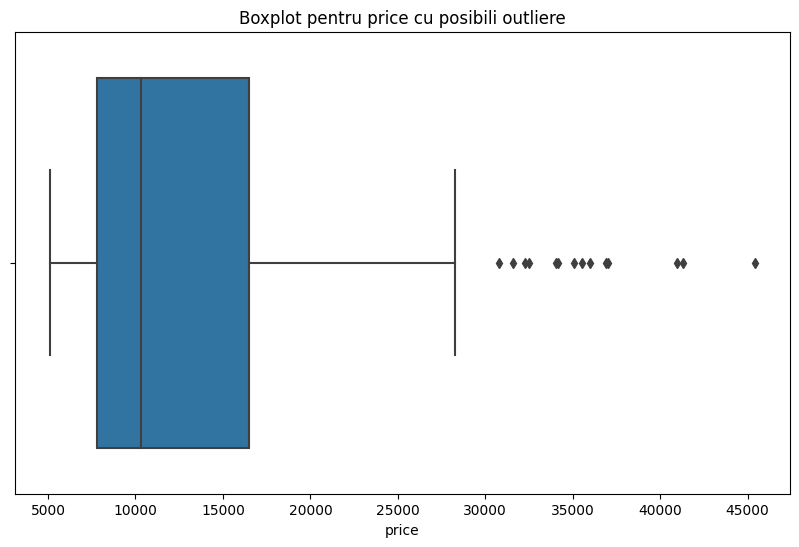

S-au detectat 6 outliere in horsepower


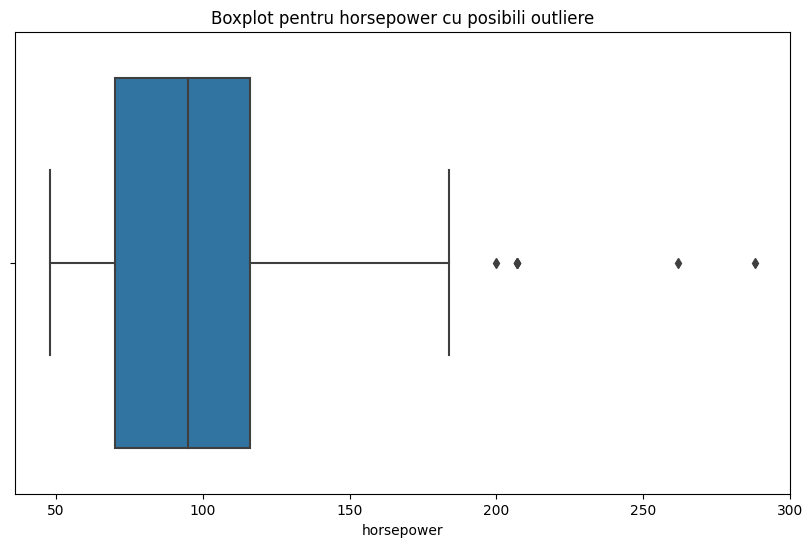

In [0]:
# detectia valorilor aberante (outliere)

numeric_cols = auto_df.select_dtypes(include=['float64', 'int64']).columns

# IQR (Inter-Quartile Range)
def detect_outliers(df, column, factor=1.75):
    Q1 = df[column].quantile(0.25) # primul quartil - separarea primelor 25% din datele ordonate (<= Q1)
    Q3 = df[column].quantile(0.75) # al treilea quartil - separa primele 75% din datele ordonate (<= Q3)
    IQR = Q3 - Q1 # latimea centrala a datelor


    # se foloseste factor de sensibilitate (e.g. 1.5-3), unde valoarea mai mica detecteaza mai multe otliere iar cea mai mare randeaza o insensibilitate mai ridicata
    
    lower_bound = Q1 - factor * IQR # orice valoare < va fi outlier inferior
    upper_bound = Q3 + factor * IQR # orice valoare > va fi outlier superior
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in ['price', 'horsepower', 'peak_rpm']:
    outliers = detect_outliers(auto_df, col)
    if not outliers.empty:
        print(f"S-au detectat {len(outliers)} outliere in {col}")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=auto_df[col])
        plt.title(f'Boxplot pentru {col} cu posibili outliere')
        plt.show()


**d)** Identificarea datelor lipsa

In [0]:
missing = auto_df.isna().sum()

print("\nValori lipsa:")
print(missing[missing > 0])

print(f"\nProcentul de valori lipsa: {missing.sum() / (auto_df.shape[0] * auto_df.shape[1]) * 100:.2f}%")


Valori lipsa:
normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

Procentul de valori lipsa: 1.11%


In [0]:
undef_col = auto_df.columns[auto_df.isna().any()]

print(f'Coloane care contin explicit valori nedefinite:\n')

undef_col

Coloane care contin explicit valori nedefinite:



Index(['normalized_losses', 'num_of_doors', 'bore', 'stroke', 'horsepower',
       'peak_rpm', 'price'],
      dtype='object')

In [0]:
auto_df[undef_col].dtypes

normalized_losses    float64
num_of_doors         float64
bore                 float64
stroke               float64
horsepower           float64
peak_rpm             float64
price                float64
dtype: object

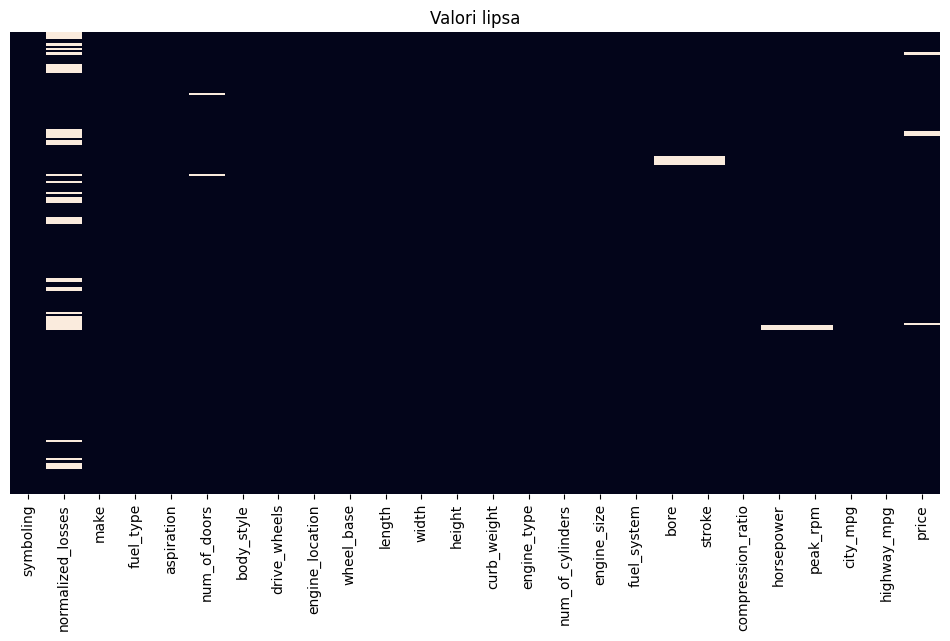

In [0]:
plt.figure(figsize=(12, 6))
sns.heatmap(auto_df.isna(), yticklabels=False, cbar=False, cmap='rocket')
plt.title('Valori lipsa')
plt.show()

In [0]:
# completare valori lipsa (NaN)

# calcularea media generala, caz exceptional
overall_mean = auto_df['normalized_losses'].mean()

def fill_group_losses(group):
    group_mean = group.mean() # media generala a grupului (e.x. make)

    if not np.isnan(group_mean):
        return group.fillna(group_mean)
    else:
        return group.fillna(overall_mean) # fallback

auto_df['normalized_losses'] = auto_df.groupby('make')['normalized_losses'].transform(fill_group_losses) # completare per grup

In [0]:
def deduction_doors(row):
    if pd.isna(row['num_of_doors']):
        if row['body_style'] in ['sedan', 'hardtop']: # deducere pe baza caroseriei
            return 4
        else:
            return 2
    else:
        return row['num_of_doors']

auto_df['num_of_doors'] = auto_df.apply(deduction_doors, axis=1)

In [0]:
overall_mean = auto_df['price'].mean()

def fill_group_price(group):
    group_mean = group.mean()

    if not np.isnan(group_mean):
        return group.fillna(group_mean)
    else:
        return group.fillna(overall_mean)


auto_df['price'] = auto_df.groupby('make')['price'].transform(fill_group_price)

In [0]:
cols_to_fill = ['bore', 'stroke']
grouping_cols = ['engine_type', 'num_of_cylinders']

for col in cols_to_fill:
    def fill_mean(series):
        mean_val = series.mean()
        if not np.isnan(mean_val):
            return series.fillna(mean_val)
        else:
            return series.fillna(auto_df[col].mean())

    auto_df[col] = auto_df.groupby(grouping_cols)[col].transform(fill_mean)

In [0]:
overall_mean = auto_df['horsepower'].mean()

def fill_horsepower_mean(series):
    mean_val = series.mean()
    if not np.isnan(mean_val):
        return series.fillna(mean_val)
    else:
        return series.fillna(overall_mean)

auto_df['horsepower'] = auto_df.groupby(['make', 'engine_size'])['horsepower'].transform(fill_horsepower_mean)

In [0]:
overall_mean = auto_df['peak_rpm'].mean()

def fill_peak_rpm_mean(series):
    mean_val = series.mean()
    if not np.isnan(mean_val):
        return series.fillna(mean_val)
    else:
        return series.fillna(overall_mean)

auto_df['peak_rpm'] = auto_df.groupby(['engine_type', 'num_of_cylinders'])['peak_rpm'].transform(fill_peak_rpm_mean)

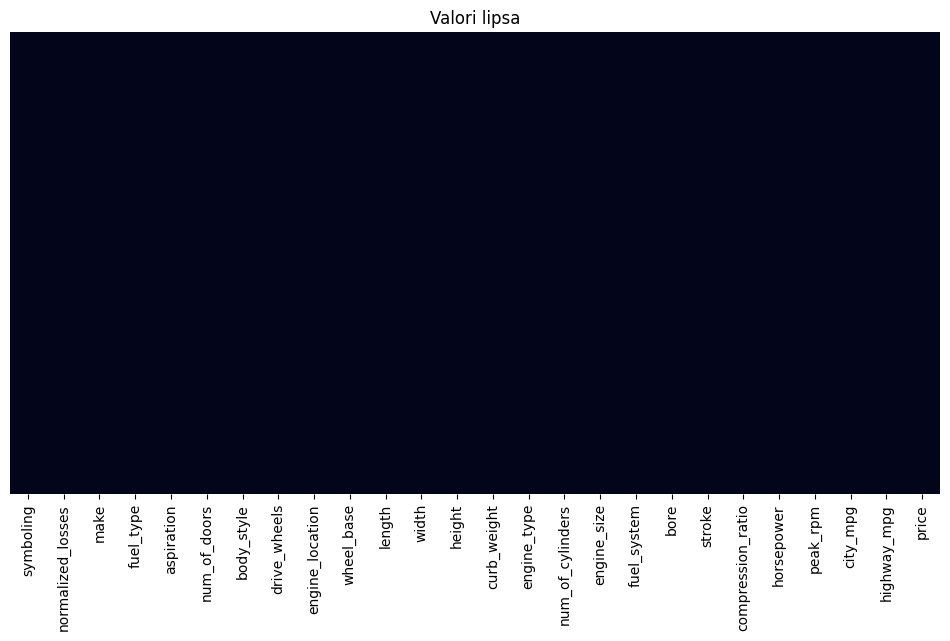

In [0]:
plt.figure(figsize=(12, 6))
sns.heatmap(auto_df.isna(), yticklabels=False, cbar=False, cmap='rocket')
plt.title('Valori lipsa')
plt.show()

###### `3. Explorarea si analiza datelor`

**a)** Analiza statistica

In [0]:
auto_df.describe() # rezumat statistic - distributia si caracteristicile principalelor variabile

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.186132,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.663110,25.219512,30.751220,13276.710569
std,1.245307,35.063201,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519211,476.988313,6.542142,6.886443,7988.852331
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [0]:
for col in ['horsepower', 'price']:
    print(f"\nDistributia valorilor pentru {col}:\n", auto_df[col].value_counts())


Distributia valorilor pentru horsepower:
 68.000000     19
70.000000     11
69.000000     10
116.000000     9
110.000000     8
95.000000      7
88.000000      6
62.000000      6
101.000000     6
160.000000     6
114.000000     6
84.000000      5
97.000000      5
102.000000     5
145.000000     5
82.000000      5
76.000000      5
111.000000     4
92.000000      4
123.000000     4
86.000000      4
90.000000      3
73.000000      3
85.000000      3
207.000000     3
182.000000     3
121.000000     3
152.000000     3
112.000000     2
56.000000      2
161.000000     2
156.000000     2
94.000000      2
52.000000      2
104.256158     2
162.000000     2
155.000000     2
184.000000     2
100.000000     2
176.000000     2
55.000000      1
262.000000     1
134.000000     1
115.000000     1
140.000000     1
48.000000      1
58.000000      1
60.000000      1
78.000000      1
135.000000     1
200.000000     1
64.000000      1
120.000000     1
72.000000      1
154.000000     1
288.000000     1
143.0

**b)** Vizualizarea datelor grafice

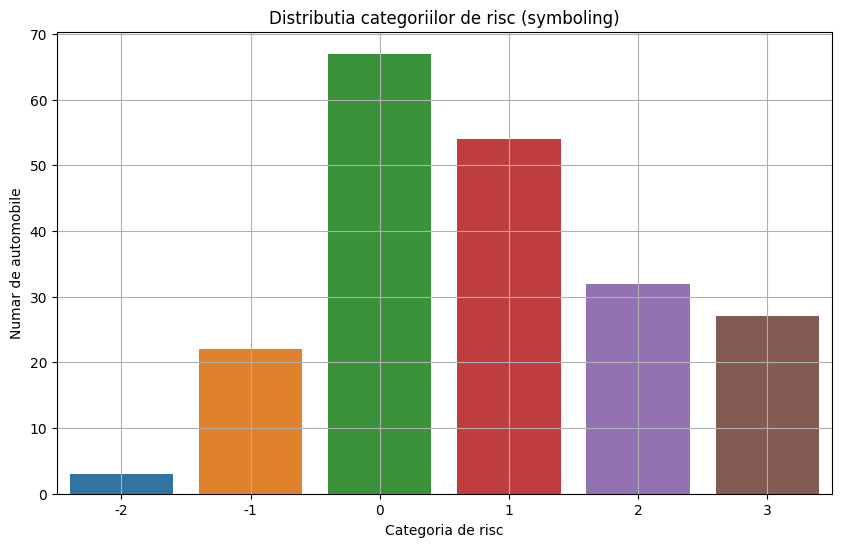

In [0]:
plt.figure(figsize=(10, 6))
sns.countplot(x='symboling', data=auto_df)
plt.title('Distributia categoriilor de risc (symboling)')
plt.xlabel('Categoria de risc')
plt.ylabel('Numar de automobile')
plt.grid(True)
plt.show()


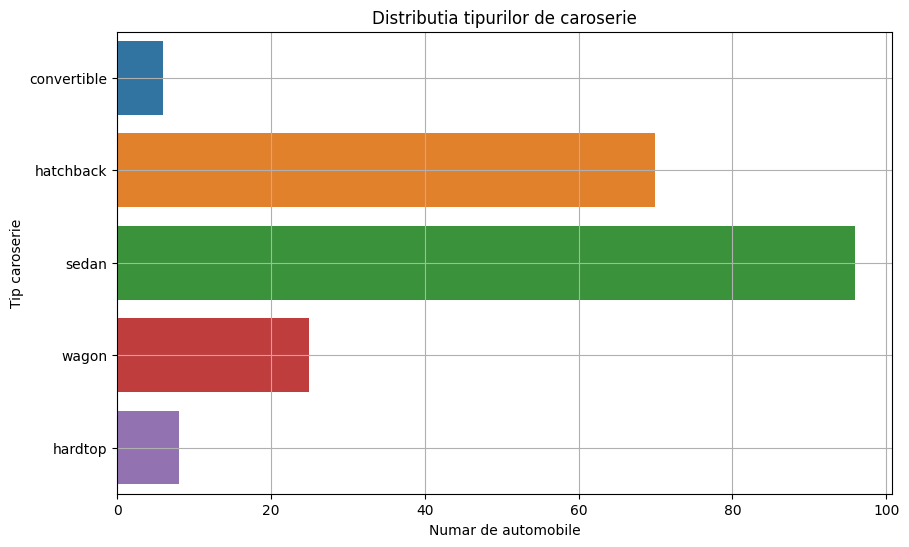

In [0]:
plt.figure(figsize=(10, 6))
sns.countplot(y='body_style', data=auto_df)
plt.title('Distributia tipurilor de caroserie')
plt.ylabel('Tip caroserie')
plt.xlabel('Numar de automobile')
plt.grid(True)
plt.show()

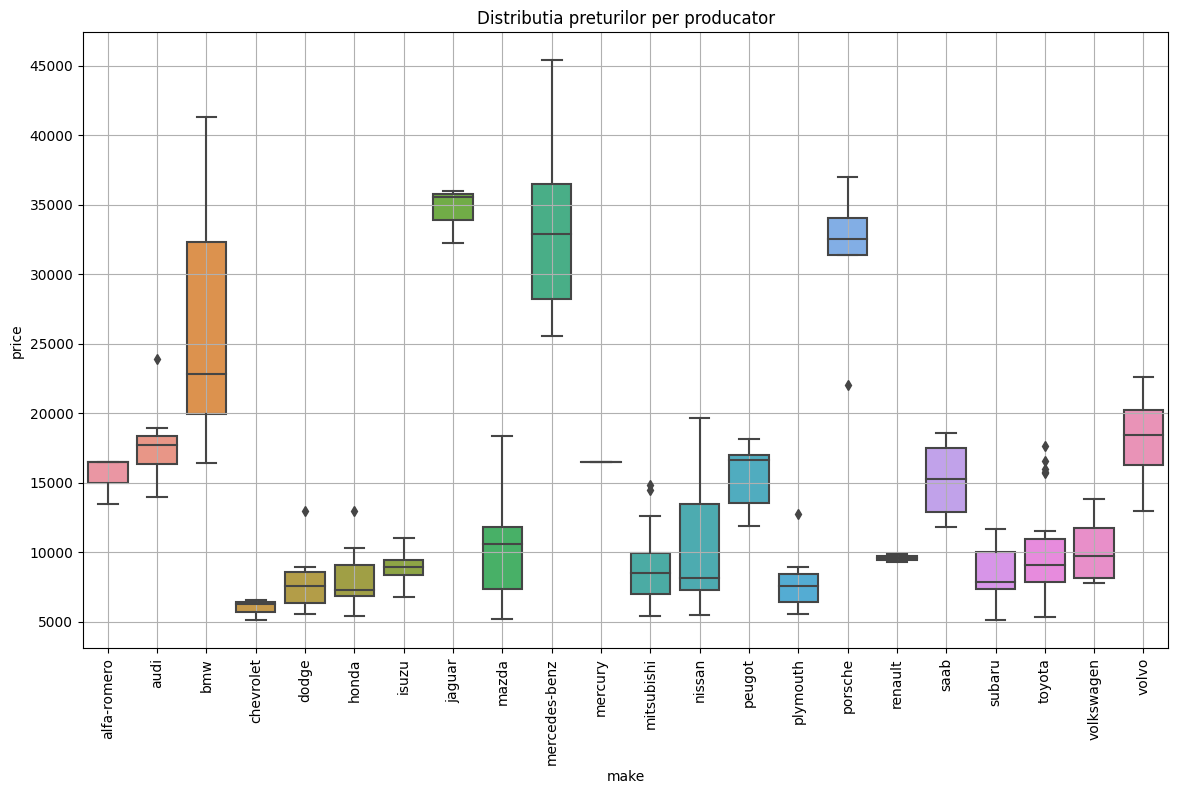

In [0]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='price', data=auto_df)
plt.title('Distributia preturilor per producator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

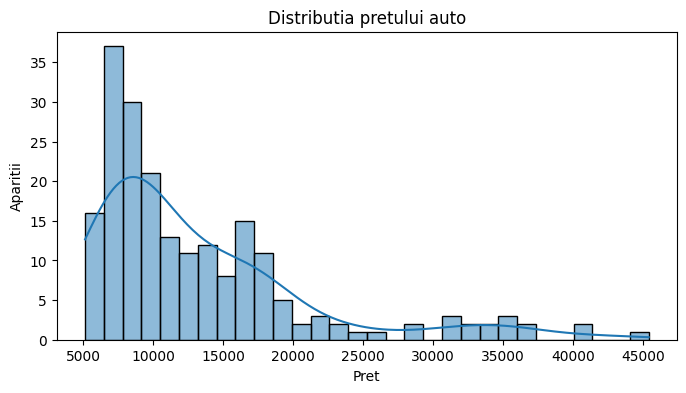

In [0]:
plt.figure(figsize=(8, 4))
sns.histplot(auto_df['price'], kde=True, bins=30)
plt.title('Distributia pretului auto')
plt.xlabel('Pret')
plt.ylabel('Aparitii')
plt.show()

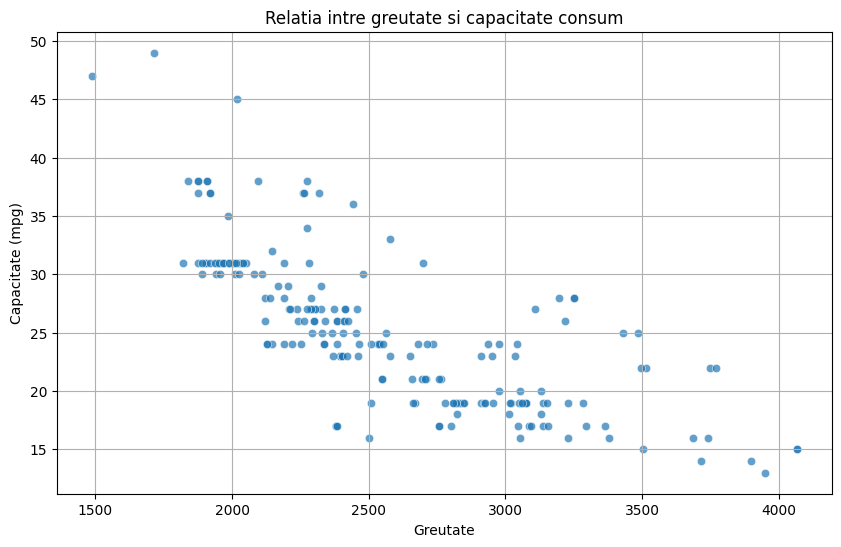

In [0]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='curb_weight', y='city_mpg', data=auto_df, alpha=0.7)
plt.title('Relatia intre greutate si capacitate consum')
plt.xlabel('Greutate')
plt.ylabel('Capacitate (mpg)')
plt.grid(True)
plt.show()

**c)** Observarea corelatiilor si identificarea tendintelor

In [0]:
from scipy import stats

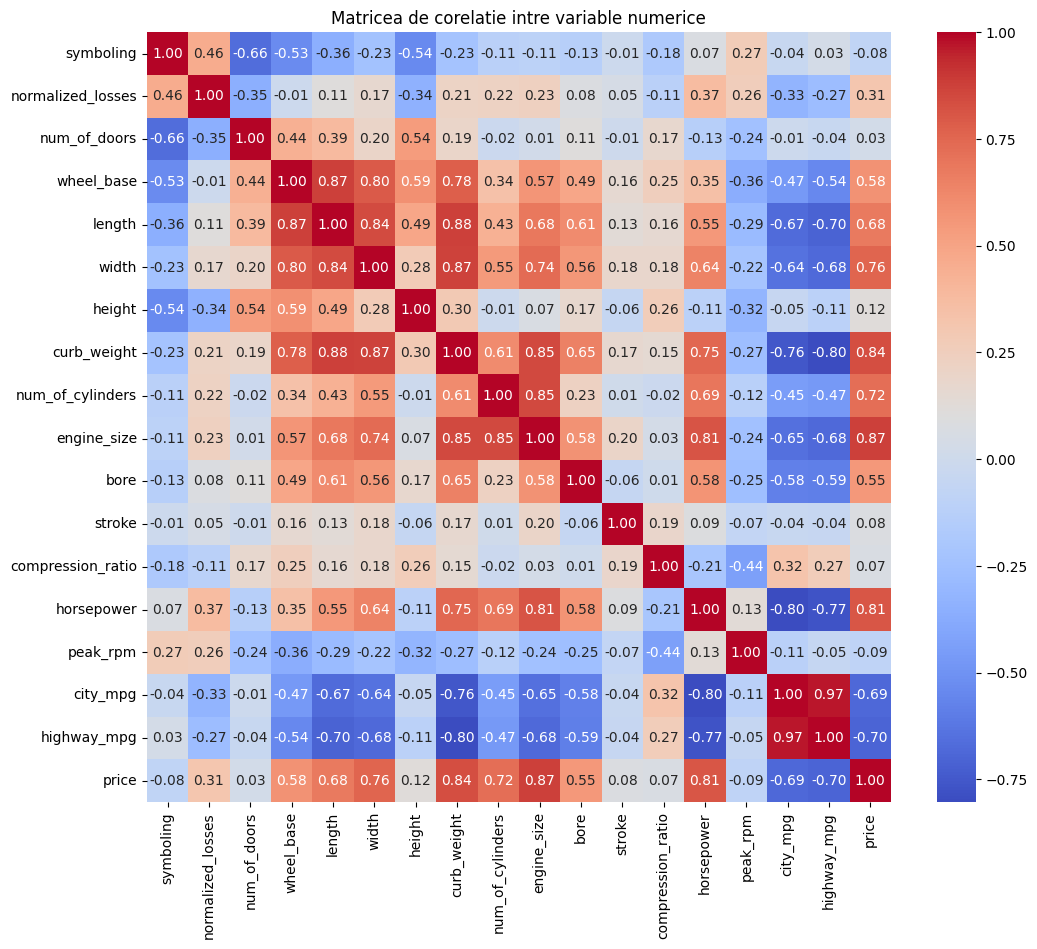

In [0]:
corr = auto_df.corr(numeric_only=True) # matricea de corelatie

# 1: corelatie perfecta
# -1: corelatie negativa perfecta
# 0: nu exista corelatie

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matricea de corelatie intre variable numerice')
plt.show()

In [0]:
print("\nValori unice pentru variabilele categorice:")

categorical_columns = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 
                      'body_style', 'drive_wheels', 'engine_location', 
                      'engine_type', 'num_of_cylinders', 'fuel_system']

for col in categorical_columns:
    print(f"\n{col}: {auto_df[col].unique()}")
    print(f"\nNumarul de valori unice pentru {col}: {auto_df[col].nunique()}")
    print(f"\nFrecvente pentru {col}:")
    print(auto_df[col].value_counts())
    print("===" * 25)



Valori unice pentru variabilele categorice:

make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Numarul de valori unice pentru make: 22

Frecvente pentru make:
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

fuel_type: ['gas' 'diesel']

Numarul de valori unice pentru fuel_type: 2

Frecvente pentru fuel_type:
gas       185
diesel     20
Name: fuel_type, dtype: int64

aspiration: ['std' 'turbo']

Numarul 

In [0]:
top_features = corr['price'].drop('price').sort_values(ascending=False).head(10)

print(f'Cele mai puternice corelatii in raport cu pretul:\n',top_features)

Cele mai puternice corelatii in raport cu pretul:
 engine_size          0.874145
curb_weight          0.835305
horsepower           0.807019
width                0.759325
num_of_cylinders     0.718305
length               0.682920
wheel_base           0.577816
bore                 0.553174
normalized_losses    0.311174
height               0.119336
Name: price, dtype: float64


**d)** Identificarea relatiilor intre atribute (caracteristici)

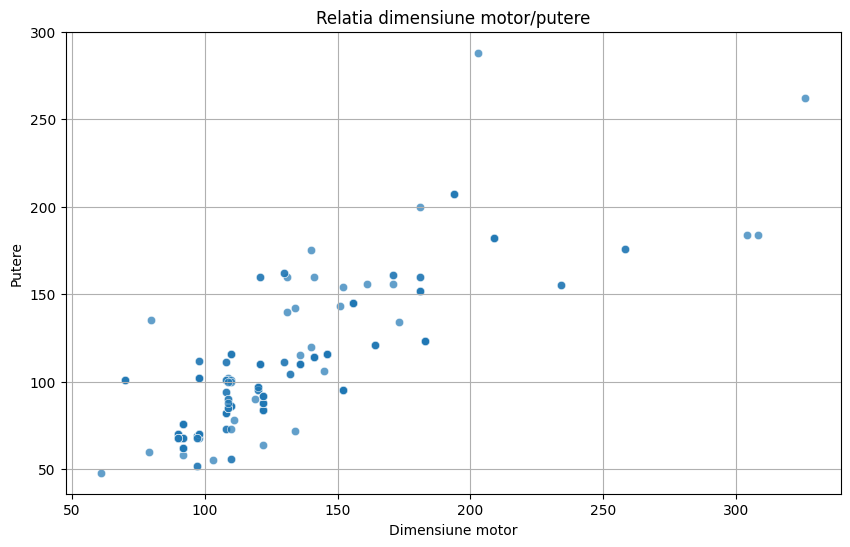

In [0]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='horsepower', data=auto_df, alpha=0.7)
plt.title('Relatia dimensiune motor/putere')
plt.xlabel('Dimensiune motor')
plt.ylabel('Putere')
plt.grid(True)
plt.show()

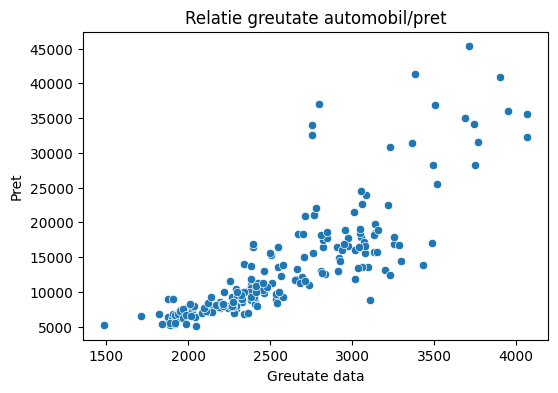

In [0]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='curb_weight', y='price', data=auto_df)
plt.title('Relatie greutate automobil/pret')
plt.xlabel('Greutate data')
plt.ylabel('Pret')
plt.show()

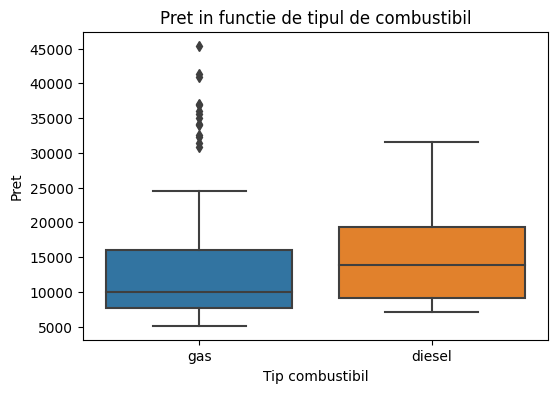

In [0]:
plt.figure(figsize=(6,4))
sns.boxplot(x='fuel_type', y='price', data=auto_df)
plt.title('Pret in functie de tipul de combustibil')
plt.xlabel('Tip combustibil')
plt.ylabel('Pret')
plt.show()

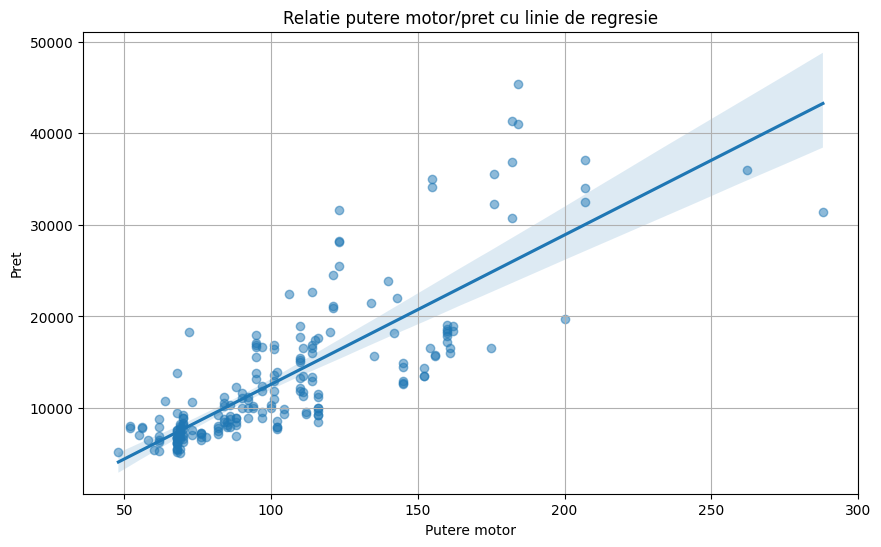

In [0]:
plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=auto_df, scatter_kws={'alpha':0.5})
plt.title('Relatie putere motor/pret cu linie de regresie')
plt.xlabel('Putere motor')
plt.ylabel('Pret')
plt.grid(True)
plt.show()

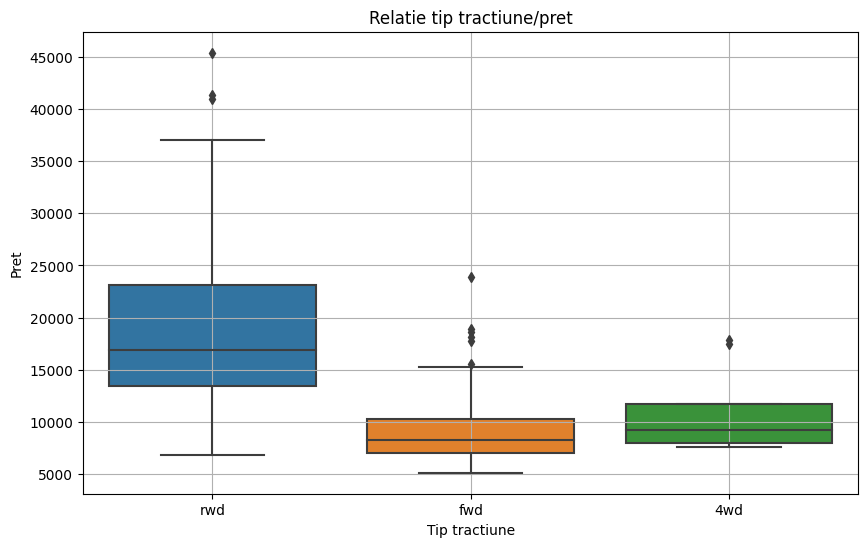

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive_wheels', y='price', data=auto_df)
plt.title('Relatie tip tractiune/pret')
plt.xlabel('Tip tractiune')
plt.ylabel('Pret')
plt.grid(True)
plt.show()

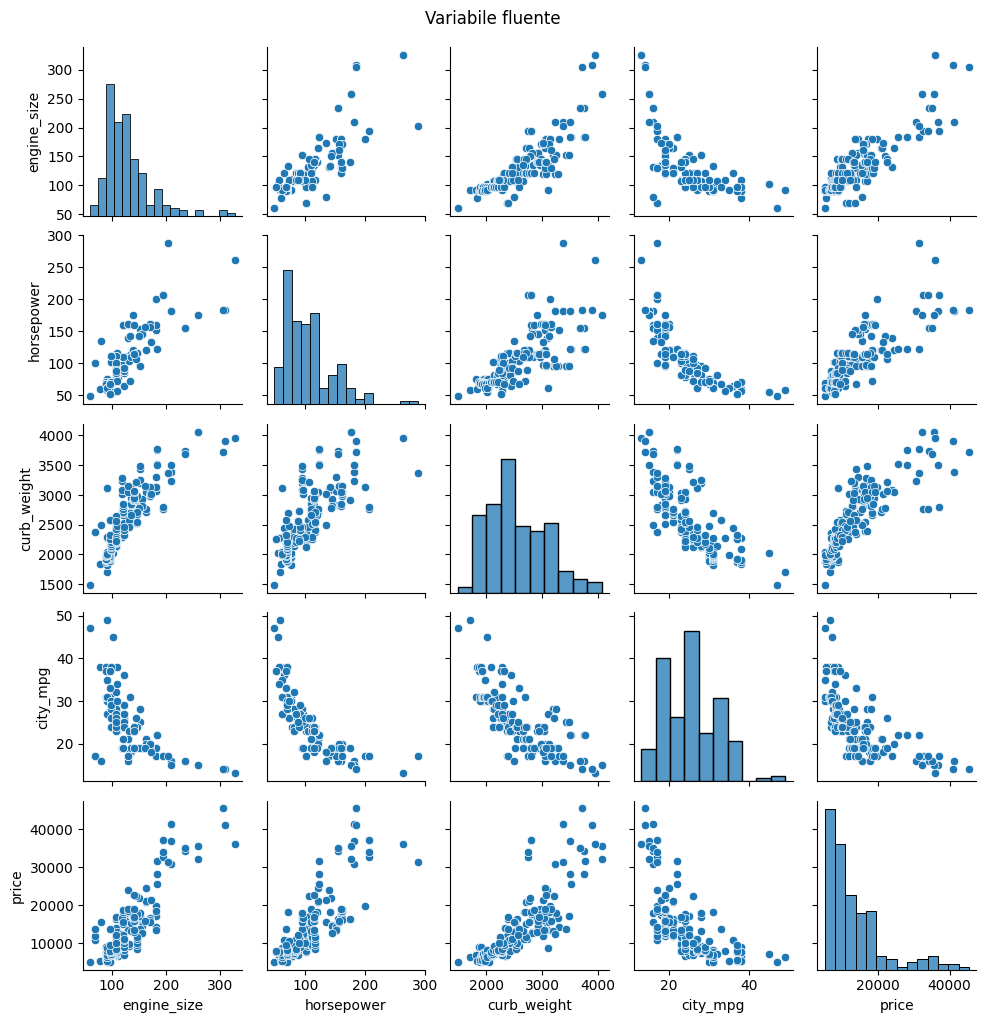

In [0]:
imp_var = ['engine_size', 'horsepower', 'curb_weight', 'city_mpg', 'price']
sns.pairplot(auto_df[imp_var].dropna(), height=2)
plt.suptitle('Variabile fluente', y=1.02)
plt.show()

###### `4. Modelarea ML`

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**a)** Divizarea colectiei in multimi de training, validare si testare

In [0]:
# codificare one-hot

# transformare variabile categorice in variabile numerice pentru utilizare in model ML; feicare categorie are o coloana separata

auto_df_codificat = pd.get_dummies(auto_df, columns=[
    "make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location",
    "engine_type", "fuel_system"
], drop_first=True)

print("\nDimensiunea datelor dupa codificarea one-hot:", auto_df_codificat.shape)


Dimensiunea datelor dupa codificarea one-hot: (205, 61)


In [0]:
auto_df_codificat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized_losses     205 non-null    float64
 2   num_of_doors          205 non-null    float64
 3   wheel_base            205 non-null    float64
 4   length                205 non-null    float64
 5   width                 205 non-null    float64
 6   height                205 non-null    float64
 7   curb_weight           205 non-null    int64  
 8   num_of_cylinders      205 non-null    int64  
 9   engine_size           205 non-null    int64  
 10  bore                  205 non-null    float64
 11  stroke                205 non-null    float64
 12  compression_ratio     205 non-null    float64
 13  horsepower            205 non-null    float64
 14  peak_rpm              205 non-null    float64
 15  city_mpg              2

In [0]:
# impartirea datelor intr-un set de variabile explciative (features) si variabila tinta (target)

X = auto_df_codificat.drop('price', axis=1) # pastrare features folosite pentru prezicere y
y = auto_df_codificat['price'] # variabla ce va fi prezisa (tinta)

print("\nDimensiunea X (cu variabile categorice):", X.shape)
print("Dimensiunea y:", y.shape)


Dimensiunea X (cu variabile categorice): (205, 60)
Dimensiunea y: (205,)


In [0]:
# 80% antrenare + validare (train_val), 20% testare (test)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# imaprtire suplimentara din 80% (train_val), se folosesc 75% pentru antrenare si 25% validare

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("\nDimensiunea setului de antrenare:", X_train.shape) # antrenare model; modelul invata pe acest set de date
print("Dimensiunea setului de validare:", X_val.shape) # ajustare parametrii model; hiperparemtrii
print("Dimensiunea setului de testare:", X_test.shape) # evaluare finala pentru estimare performanta pe date necunoscute


Dimensiunea setului de antrenare: (123, 60)
Dimensiunea setului de validare: (41, 60)
Dimensiunea setului de testare: (41, 60)


**b)** Standardizare

In [0]:
# scalare date

# variabilele explicative (features) sunt aduse la o scara comuna; evita influenta valorilor mari (ex. 0-1 vs 1000-100000)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**c)** Alegerea modelelor ML si antrenarea pe multimea de testare

In [0]:
lr_model = LinearRegression() # model regresie liniara
lr_model.fit(X_train_scaled, y_train) # antrenare model

LinearRegression()

In [0]:
rr_model = Ridge(alpha=1.0)
rr_model.fit(X_train_scaled, y_train)

Ridge()

In [0]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

**d)** Validarea modelelor pe multimea de validare

In [0]:
# Regresie Liniara

y_val_pred_lr = lr_model.predict(X_val_scaled)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
rmse_val_lr = np.sqrt(mse_val_lr)
r2_val_lr = r2_score(y_val, y_val_pred_lr)
mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)

print("Perfromanta Regresiei Liniare pe setul de validare:")
print(f"MSE: {mse_val_lr:.2f}")
print(f"RMSE: {rmse_val_lr:.2f}")
print(f"MAE: {mae_val_lr:.2f}")
print(f"R^2: {r2_val_lr:.4f}")

# MSE (Mean Squared Error) este media patratelor erorilor dintre valorilereale si cele prezise (penalizare erori mari); valori mai mici sunt de preferat

# RMSE (Root Mean Squared Error) este radicalul MSE, mai usor d einteles pentru interpretare

# MAE (Mean Absolute Error) este media valorilor absolute ale diferentelor dintre valoarea reala si cea prezisa (nu penalizeaza la fel de mult ca MSE); e.g. modelul greste in medie cu 1843 USD

# R^2 este coeficientul de determinare (cu valoare intre 0 si 1) unde afiseaza cat de mult din variatia variabilei tinta (target y) este explicata de model; ex. modelul explica 90.48% din variatia preturilor; preferat cat mai aproape de 1

Perfromanta Regresiei Liniare pe setul de validare:
MSE: 7063460.72
RMSE: 2657.72
MAE: 1843.02
R^2: 0.9048


In [0]:
# Ridge

y_val_pred_rr = rr_model.predict(X_val_scaled)
mse_val_rr = mean_squared_error(y_val, y_val_pred_rr)
rmse_val_rr = np.sqrt(mse_val_rr)
r2_val_rr = r2_score(y_val, y_val_pred_rr)
mae_val_rr = mean_absolute_error(y_val, y_val_pred_rr)

print("Perfromanta Ridge pe setul de validare:")
print(f"MSE: {mse_val_rr:.2f}")
print(f"RMSE: {rmse_val_rr:.2f}")
print(f"MAE: {mae_val_rr:.2f}")
print(f"R^2: {r2_val_rr:.4f}")

Perfromanta Ridge pe setul de validare:
MSE: 7015572.29
RMSE: 2648.69
MAE: 1787.00
R^2: 0.9055


In [0]:
# Random Forest

y_val_pred_rf = rf_model.predict(X_val_scaled)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)

print("\nPerfromanta Random Forest pe setul de validare:")
print(f"MSE: {mse_val_rf:.2f}")
print(f"RMSE: {rmse_val_rf:.2f}")
print(f"MAE: {mae_val_rf:.2f}")
print(f"R^2: {r2_val_rf:.4f}")


Perfromanta Random Forest pe setul de validare:
MSE: 6410678.71
RMSE: 2531.93
MAE: 1536.14
R^2: 0.9136


**e)** Tunarea hiperparametrilor

In [0]:
# proces de cautare a celor mai buni hiperparametri pentru model, evaluand performanta raportat la scorul R^2 pe setul de validare

best_r2 = r2_val_rf # R^2 initial
best_model = rf_model # model ales

print("Tunarea hiperparametrilor modelului Random Forest")

max_depths = [None, 10, 20] # limita adancimii arborilor
n_estimators = [50, 100, 200] # numar de arbori

best_params = {'max_depth': None, 'n_estimators': 100} # init

# cautare parametrii eficienti
for depth in max_depths:
    for n_est in n_estimators:

        if depth == best_params['max_depth'] and n_est == best_params['n_estimators']: # daca e deja calculata skip
            continue

        rf = RandomForestRegressor(max_depth=depth, n_estimators=n_est, random_state=42) # conceptie model cu hiperparametrii dati
        rf.fit(X_train_scaled, y_train) # antrenare
        y_val_pred = rf.predict(X_val_scaled) # executare predictii
        r2 = r2_score(y_val, y_val_pred) # aflare scor R^2

        print(f'max_depth={depth}, n_estimators={n_est}: R^2 = {r2:.4f}')

        if r2 > best_r2:
            best_r2 = r2
            best_params = {'max_depth': depth, 'n_estimators': n_est}
            best_model = rf

print(f"\nCei mai buni parametri: {best_params}")
print(f"Cel mai bun R^2 pe validare: {best_r2:.4f}")

Tunarea hiperparametrilor modelului Random Forest
max_depth=None, n_estimators=50: R^2 = 0.9113
max_depth=None, n_estimators=200: R^2 = 0.9133
max_depth=10, n_estimators=50: R^2 = 0.9134
max_depth=10, n_estimators=100: R^2 = 0.9146
max_depth=10, n_estimators=200: R^2 = 0.9143
max_depth=20, n_estimators=50: R^2 = 0.9113
max_depth=20, n_estimators=100: R^2 = 0.9136
max_depth=20, n_estimators=200: R^2 = 0.9133

Cei mai buni parametri: {'max_depth': 10, 'n_estimators': 100}
Cel mai bun R^2 pe validare: 0.9146


**f)** Evaluarea model pe multimi de testare

In [0]:
y_test_pred = best_model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Evaluarea finala a modelului RF pe setul de testare:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R^2: {r2_test:.4f}")

Evaluarea finala a modelului RF pe setul de testare:
MSE: 4691803.34
RMSE: 2166.06
MAE: 1487.48
R^2: 0.9406


**g)** Evaluare performanta model

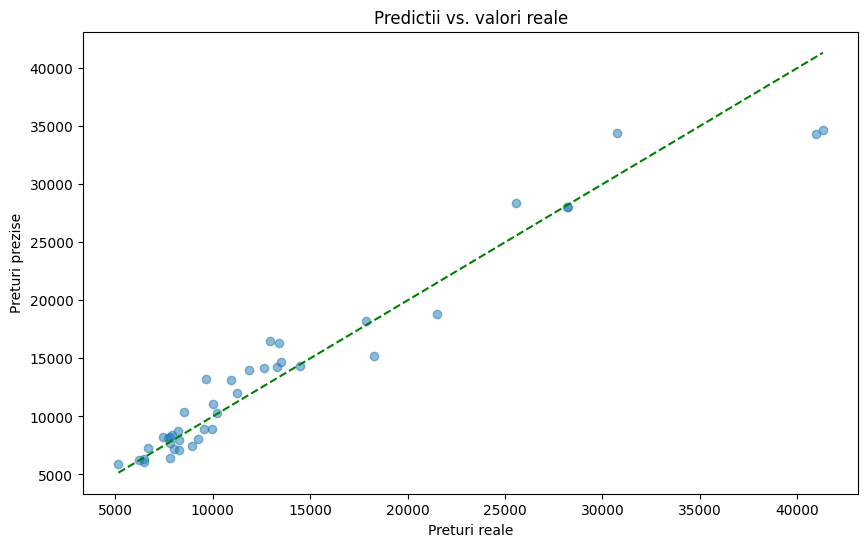

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')
plt.xlabel('Preturi reale')
plt.ylabel('Preturi prezise')
plt.title('Predictii vs. valori reale')
plt.show()

# apropiere puncte fata de trendul (g) prezis

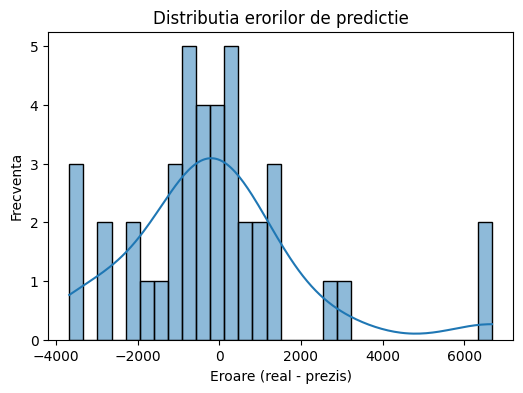

In [0]:
errors = y_test - y_test_pred
plt.figure(figsize=(6, 4))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distributia erorilor de predictie')
plt.xlabel('Eroare (real - prezis)')
plt.ylabel('Frecventa')
plt.show()

# valori negative - supraestimare pret final
# valori pozitive - subestimaare pret final
# valori apropiate de zero - predictii corecte

# este necesara o grupare/distributie in jurul valorii zero

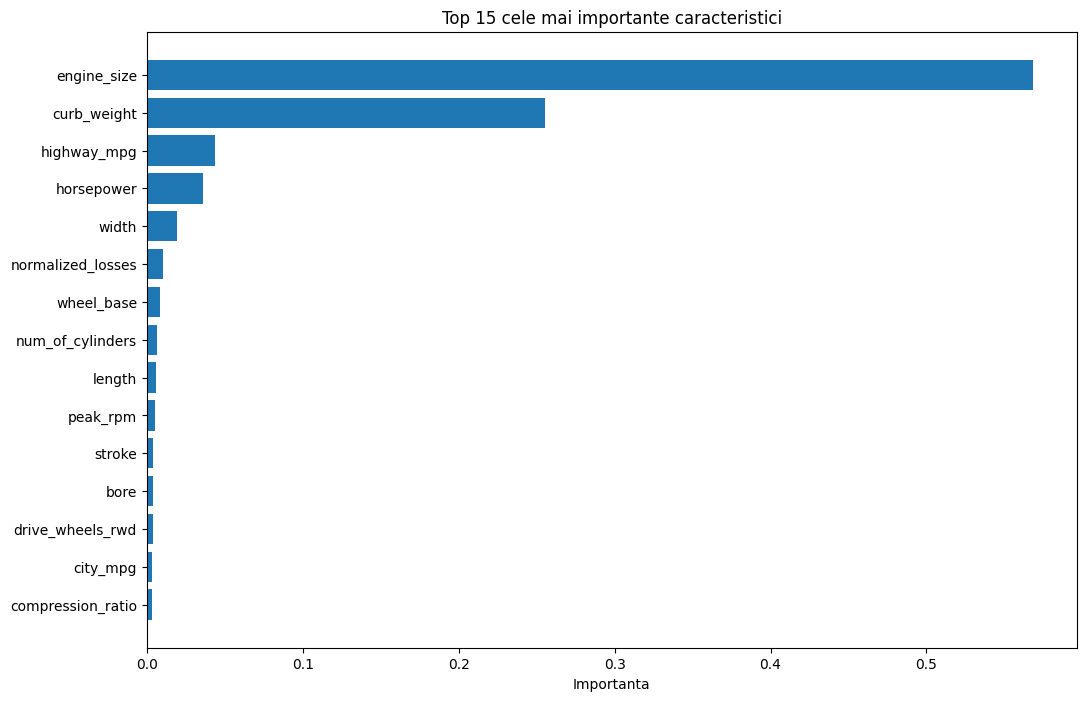


Top 15 cele mai importante caracteristici:
       Caracteristica  Importanta
9         engine_size    0.568051
7         curb_weight    0.255504
16        highway_mpg    0.043691
13         horsepower    0.035771
5               width    0.019098
1   normalized_losses    0.010147
3          wheel_base    0.008491
8    num_of_cylinders    0.006500
4              length    0.005918
14           peak_rpm    0.004986
11             stroke    0.004265
10               bore    0.004238
45   drive_wheels_rwd    0.004114
15           city_mpg    0.003386
12  compression_ratio    0.003283


In [0]:
# vizualizare importanta caracteristici (atribute) model Random Forest in urma antrenarii (impact variabile pentru prezicerea pretului)

feature_importances = best_model.feature_importances_
feature_names = X.columns # import din setul de date X (variabile explicative)

importance_df = pd.DataFrame({
    'Caracteristica': feature_names,
    'Importanta': feature_importances
}).sort_values('Importanta', ascending=False)

top_15 = importance_df.head(15)

plt.figure(figsize=(12, 8))
plt.barh(top_15['Caracteristica'], top_15['Importanta'])
plt.xlabel('Importanta')
plt.title('Top 15 cele mai importante caracteristici')
plt.gca().invert_yaxis()
plt.show()

print("\nTop 15 cele mai importante caracteristici:")
print(top_15)

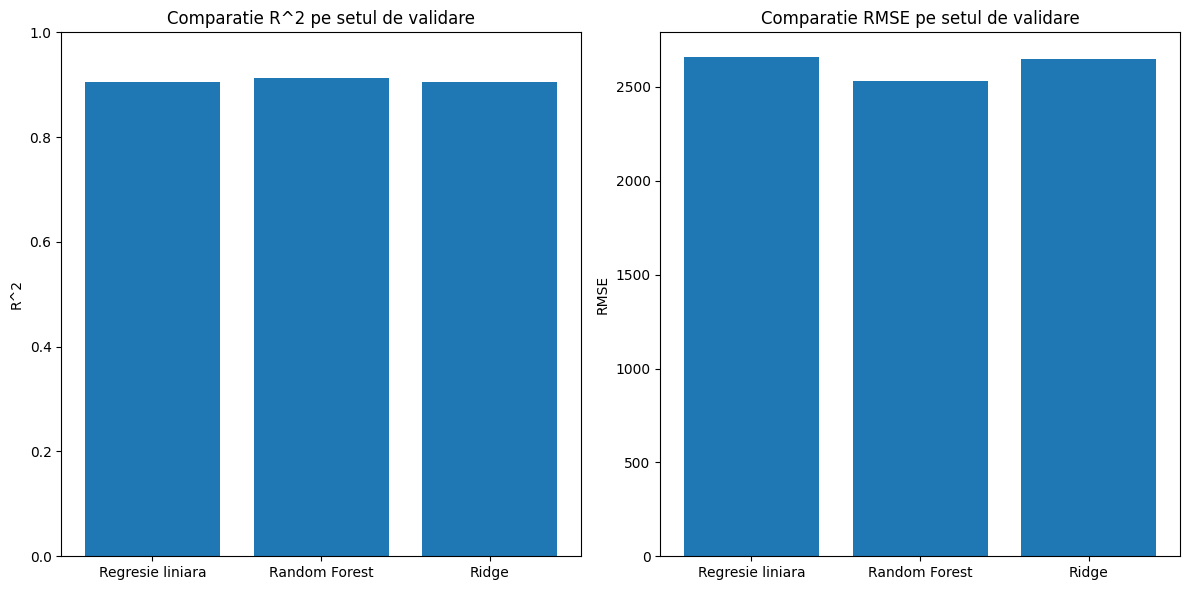

In [0]:
# comparare performante modele regresie

model_names = ['Regresie liniara', 'Random Forest', 'Ridge']
r2_scores = [r2_val_lr, r2_val_rf, r2_val_rr]
rmse_scores = [rmse_val_lr, rmse_val_rf, rmse_val_rr]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores)
plt.ylim(0, 1)
plt.title('Comparatie R^2 pe setul de validare')
plt.ylabel('R^2')

plt.subplot(1, 2, 2)
plt.bar(model_names, rmse_scores)
plt.title('Comparatie RMSE pe setul de validare')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

###### `4. Predictie pe baza modelului`

In [0]:
# one-hot groups

car_predict = {
    'symboling': 1,
    'normalized_losses': 120.0,
    'num_of_doors': 4.0,
    'wheel_base': 95.7,
    'length': 172.4,
    'width': 65.2,
    'height': 54.1,
    'curb_weight': 2337,
    'num_of_cylinders': 4,
    'engine_size': 109,
    'bore': 3.19,
    'stroke': 3.4,
    'compression_ratio': 9.0,
    'horsepower': 102.0,
    'peak_rpm': 5500.0,
    'city_mpg': 24,
    'highway_mpg': 30,

    # make
    'make_audi': 1,
    'make_bmw': 0,
    'make_chevrolet': 0,
    'make_dodge': 0,
    'make_honda': 0,
    'make_isuzu': 0,
    'make_jaguar': 0,
    'make_mazda': 0,
    'make_mercedes-benz': 0,
    'make_mercury': 0,
    'make_mitsubishi': 0,
    'make_nissan': 0,
    'make_peugot': 0,
    'make_plymouth': 0,
    'make_porsche': 0,
    'make_renault': 0,
    'make_saab': 0,
    'make_subaru': 0,
    'make_toyota': 0,
    'make_volkswagen': 0,
    'make_volvo': 0,

    # car details
    'fuel_type_gas': 1,
    'aspiration_turbo': 0,
    'body_style_hardtop': 0,
    'body_style_hatchback': 0,
    'body_style_sedan': 1,
    'body_style_wagon': 0,
    'drive_wheels_fwd': 1,
    'drive_wheels_rwd': 0,
    'engine_location_rear': 0,
    'engine_type_dohcv': 0,
    'engine_type_l': 0,
    'engine_type_ohc': 1,
    'engine_type_ohcf': 0,
    'engine_type_ohcv': 0,
    'engine_type_rotor': 0,
    'fuel_system_2bbl': 0,
    'fuel_system_4bbl': 0,
    'fuel_system_idi': 0,
    'fuel_system_mfi': 0,
    'fuel_system_mpfi': 1,
    'fuel_system_spdi': 0,
    'fuel_system_spfi': 0
}

In [0]:
auto_df_input = pd.DataFrame([car_predict])
auto_df_input_scaled = scaler.transform(auto_df_input)

In [0]:
price_estimate = rf_model.predict(auto_df_input_scaled)
print(f"Pret estimat model masina: {price_estimate[0]:.2f} USD")

Pret estimat model masina: 10316.79 USD


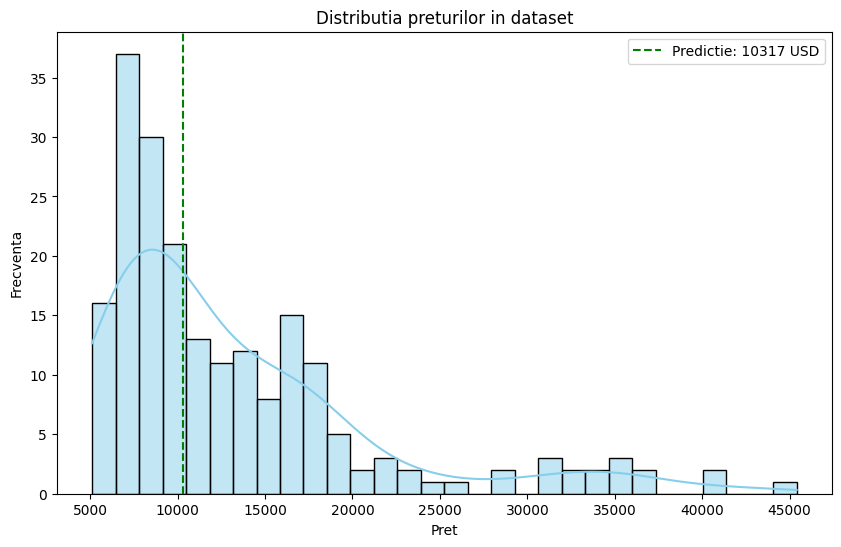

In [0]:
# preluare pret esimat
new_price = price_estimate[0]

# histograma preturi existente si valoare prezisa
plt.figure(figsize=(10, 6))
sns.histplot(auto_df_codificat['price'], kde=True, bins=30, color='skyblue')
plt.axvline(new_price, color='green', linestyle='--', label=f'Predictie: {new_price:.0f} USD')
plt.title('Distributia preturilor in dataset')
plt.xlabel('Pret')
plt.ylabel('Frecventa')
plt.legend()
plt.show()

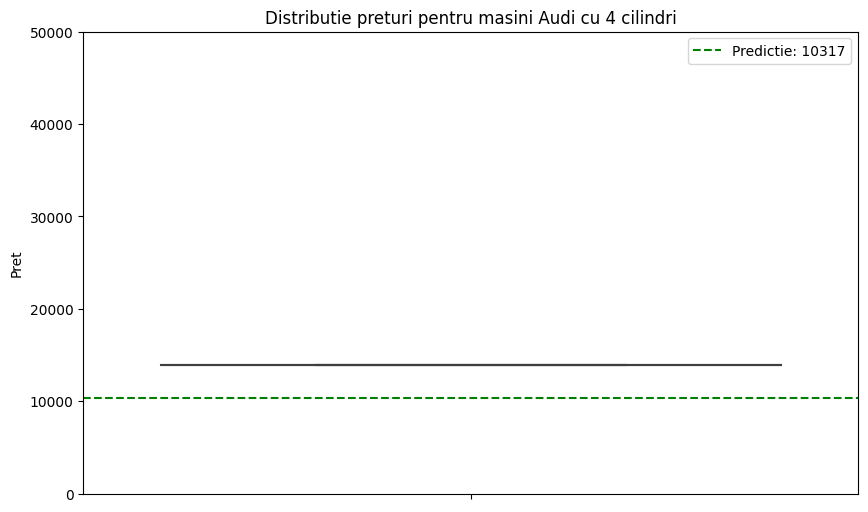

In [0]:
# comparare vs. model existent
make_group = auto_df_codificat[
    (auto_df_codificat['make_audi'] == 1) &
    (auto_df_codificat['num_of_cylinders'] == 4)
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=make_group, y='price')
plt.axhline(new_price, color='green', linestyle='--', label=f'Predictie: {new_price:.0f}')
plt.title('Distributie preturi pentru masini Audi cu 4 cilindri')
plt.ylabel('Pret')
plt.ylim(0, 50000)
plt.legend()
plt.show()

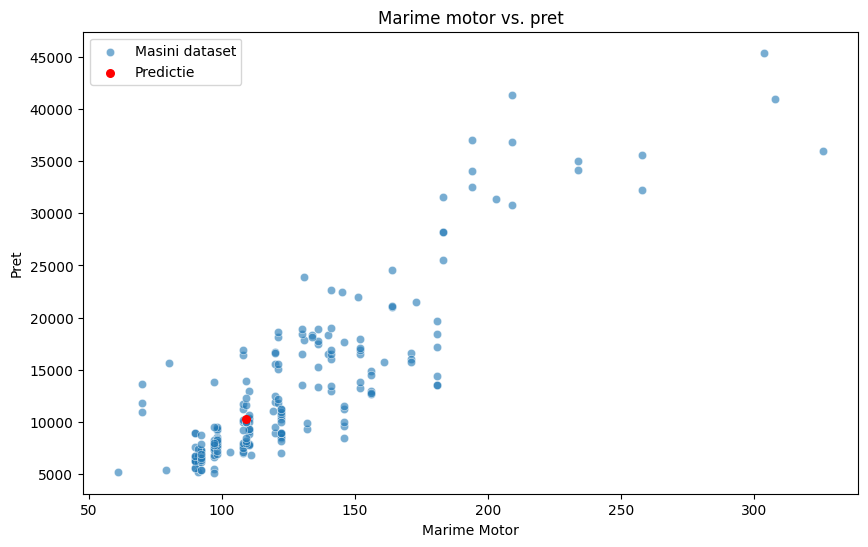

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=auto_df_codificat, x='engine_size', y='price', alpha=0.6, label='Masini dataset')
plt.scatter(make_group['engine_size'], new_price, color='red', label='Predictie', s=30)
plt.title('Marime motor vs. pret')
plt.xlabel('Marime Motor')
plt.ylabel('Pret')
plt.legend()
plt.show()

###### `5. Scurta descriere a rezultatelor obtinute`

Modelul Random Forest este cel mai performant in prezicerea pretului automobilelor.

Coeficientul de determinare (R^2) pe setul de testare este 0.9406, adica aproximativ 94.1% din variatia pretului este explicata de model.
Eroarea medie absoluta (MAE) este de 1487.
Eroarea patratica medie (RMSE) este de 2166.

Analiza importantei caracteristicilor arata ca cele mai influente atribute in determinarea pretului sunt:
- engine_size: 0.5681
- curb_weight: 0.2555
- highway_mpg: 0.0437
- horsepower: 0.0358
- width: 0.0191

Asadar, aceste caracteristici (descrescator) au cel mai semnificativ impact asupra pretului unui automobil.

Comparatia celor trei modele:
- Regresie liniara: R^2 = 0.9048, RMSE = 2657.72
- Random Forest: R^2 = 0.9136, RMSE = 2531.93
- Ridge: R^2 = 0.9055, RMSE = 2648.69

Regresia liniara si Ridge au o performanta extrem de asemanatoare.